# Esteganografía en Señales

Este notebook es un pequeño ejemplo de como codificar un pequeño mensaje dentro de una señal. Cada caracter del mesnaje es transformada a decimal (siguiendo la codificación ASCII) y codificado en dicha frecuencia dentro de la señal. 

Por ejemplo la letra **a** en ASCII equivale a 97, pues bien, a la señal resultante se le añadirá una señal cuya frecuencia sea 97.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter

En un mensaje puede haber carácteres repetidos. Por ejemplo en la palabra **casa** se repite 2 veces el caracter **a**. Si codificamos en la misma frecuencia ambos carácteres nos va a ser imposible decodificar el número de repeticiones de cada caracter. Para poder realizar la codificación se usa el siguiente esquema:

$ codificacion(c, r) = r*256 + ascii(c) $

Es decir, la codificación se realiza en función del caracter y de la repetición del mismo. Por último, al usar la codificación ASCII y darnos 256 posibles valores se multiplica por este número

In [2]:
msg = "Coronavirus"
msg_to_encode = []
counter = Counter()
for i in msg:
    counter.update(i)
    repeats = counter[i]-1
    msg_to_encode.append(repeats*256+ord(i))
msg_to_encode

[67, 111, 114, 367, 110, 97, 118, 105, 370, 117, 115]

#### Construimos la señal resultante como una suma de los senos de cada uno de los carácteres

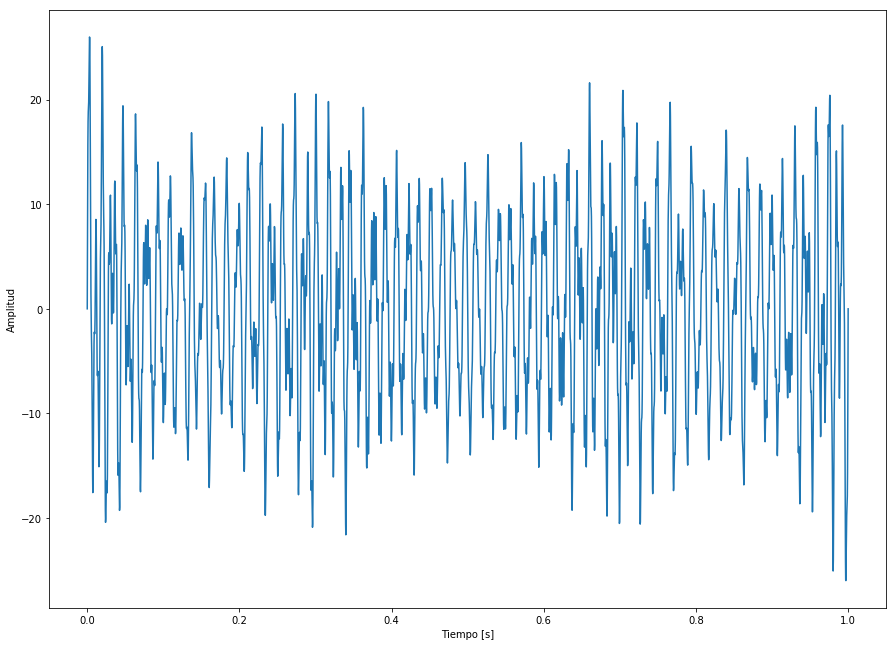

In [3]:
fig = plt.gcf()
fig.set_size_inches(15,11)
msg = msg_to_encode
N = np.max(msg_to_encode)*10
t = np.linspace(0, 1, N)
s = 0
for index, i in enumerate(msg):
    s += (1/((index+1)*0.1))*np.sin(i * 2 * np.pi * t)

plt.ylabel("Amplitud")
plt.xlabel("Tiempo [s]")
plt.plot(t, s)
plt.show()

 La señal resultante del apartado anterior se encuentra en el dominio del tiempo. A continuación aplicamos Fourier para pasar al dominio de la frecuencia y poder obtener las frecuencias de la señal. Para ello usamos la transformada rápida de fourier que nos ofrece un orden de complejidad de $O(N*log(N))$

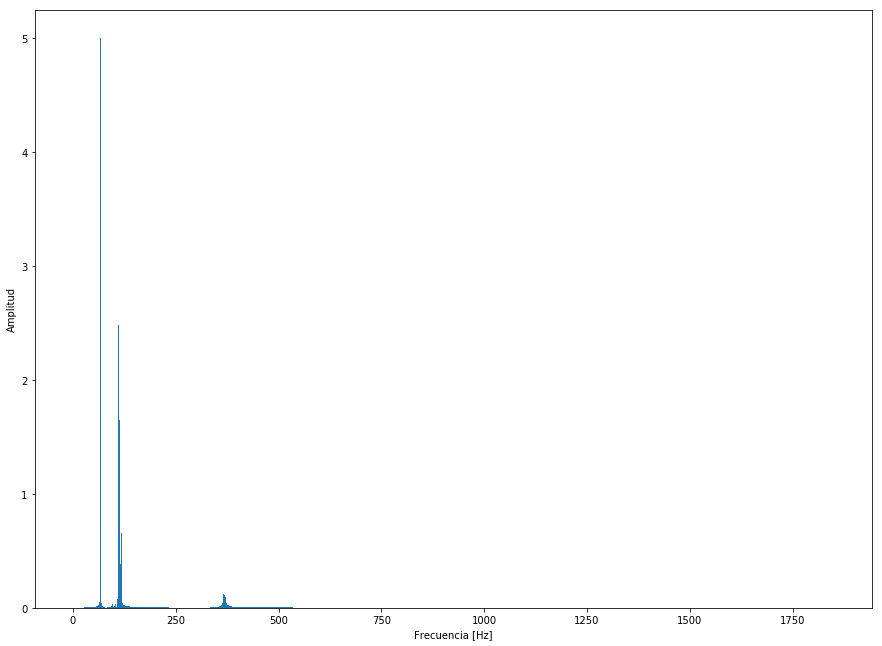

In [4]:
fig = plt.gcf()
fig.set_size_inches(15,11)
fft = np.fft.fft(s)
T = t[1] - t[0]

f = np.linspace(0, 1 / T, N)

coef_fourier=np.abs(fft)[:N // 2] * 1 / N
plt.ylabel("Amplitud")
plt.xlabel("Frecuencia [Hz]")
plt.bar(f[:N // 2], coef_fourier, width=1.5)
plt.show()

### Calculamos los picos de mayor frecuencia obtenidos mediante la transformada de Fourier

In [5]:
freqs = np.fft.fftfreq(N//2) 
result = freqs[np.argsort(coef_fourier)[::-1]]
print("Frecuencias dominantes", result[:10] * (N//2))

Frecuencias dominantes [ 67. 111. 114. 367. 110.  97. 118. 105. 370. 117.]


Una vez obtenidas las frecuencias predominantes podemos recuperar el mensaje que hemos codificado en la señal. Para ello usamos modulo 256 (ya que al principio hemos multiplicado por 256 para codificar las repeticiones) y como vemos obtenemos el mensaje que hemos codificado inicialmente.

In [6]:
"".join([chr(int(x%256)) for x in result[:11]*(N//2) if x > 0])

'Coronavirus'

Esta codificación tiene 2 limitaciones actualmente. La primera es que yo he recuperado los primeros 11 caracteres porque se que el mensaje original tenía 11 caracteres. Realmente el mensaje codificado tendrá N caracteres, pero solo tienen sentido los primeros, aquellos donde esta codificado el mensaje original. En la siguiente celda se puede observar el contenido de todo el mensaje.

La segunda limitación es debido al teorema del muestreo de Nyquist–Shannon que explicado facilmente y aplicado a este ejemplo nos dice que para codificar mensajes más grandes necesitamos valores de N más grandes. Si esto no ocurre así lo que pasa es que vamos a recuperar mal el mensaje codificado.

In [7]:
"".join([chr(int(x%256)) for x in result*(N//2) if x > 0])

'CoronavirusnpsBDmmvptAlxluEtykhv@z`wj{kF?{xig}y~=zh\x7f_\x80{G=g\x81f|q\x82}<\x83f\x84^~\x85\x7f;e\x86H\x80\x87e\x88:\x81d]\x89\x82\x8a9\x83\x8bc\x8c\x84\x8d8\x85\\\x8ebqI\x86\x8fb7\x90\x87\x91\x88a\x926\x89j\x93[\x8a\x94`\x95\x8b5d\x96\x8c\x97\x8d\x984_\x8e\x99ZJ\x8f\x9a3\x9b\x90\x9c\x91^\x9d\x922\x9e\x93\x9f\x94\xa0]Y\x951¡\x96¢\x97£0\x98¤\\\x99¥\x9a¦/\x9b§\x9cK¨[\x9dX©.\x9eª\x9f«\xa0¬Z¡-\xad¢®£¯¤,°¥±Y¦§²¨³+W©´ªµ«X¶¬*\xad·®¸¯¹°)º±W²»³L¼´½µ(¶¾·¿¸V¹À\'ºVÁ»¼Â½Ã¾¿&ÄUÀÅÁÂÆÃÄÇ%ÅÈÆÇÉÈTÉÊÊËË$ÌÌÍÎÍÏÐÎÑS#ÑÏÓÔÐÕÖUÑ×ØÒÙ"ÚÓÛRÛÔÝÞßÕàá!ÖâMã×äåØåçQèÙé êÚëìíÛîïÜïñòÝó\x1eôPõÞö÷øßùùàûüý\x1eáþÿc\x00â\x01\x02O\x03\x04ã\x05\x06\x07ä\x08\x1d\t\nTå\x0b\x0c\ræ\x0e\x0f\x10\x11ç\x12\x13N\x14è\x15\x1c\x16\x17\x18è\x19\x1a\x1b\x1cê\x1d\x1e\x1f ë!"#\x1b$ì%M&\'(í)*+,í-./01ï2\x1a345ð6789L:ñ;<=>?ò@ABC\x19DòEFGHIôJKLMNõOPKQRSTöNUV\x18WXYZ÷[\\]^_`÷abcdefùghijJkl\x17múnopqrstûuvwxyz{ü|S}~\x7f\x80\x81\x82ü\x83\x84\x16\x85\x86\x87\x88I\x89\x8aþ\x8b\x8c\x8d\x8e\x8f\x90\x91\x92ÿ\x93\x94\x95\x96\x97\x98\x99\x9a\x9b\x00\x9c